<a href="https://colab.research.google.com/github/wcruzIntercam1/DataScience/blob/main/Solucion_Reto_SC_63_WendyCruz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Montamos Google Drive donde vamos a leer nuestros recursos (archivos)
from google.colab import drive 
drive.mount('/content/gdrive') 

Mounted at /content/gdrive


In [2]:
##Importar la librería pandas
import pandas as pd

In [139]:
## a. Extraer la información del archivo Train.csv
data= pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/AprendizajeSupervisado/bank_marketing.csv")
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,31,self-employed,married,tertiary,no,2666,no,no,cellular,10,nov,318,2,97,6,success,yes
1,29,unemployed,single,unknown,no,1584,no,no,cellular,6,sep,245,1,-1,0,unknown,yes
2,41,blue-collar,married,secondary,no,2152,yes,no,cellular,17,nov,369,1,-1,0,unknown,no
3,50,blue-collar,married,secondary,no,84,yes,no,cellular,17,jul,18,8,-1,0,unknown,no
4,40,admin.,married,secondary,no,0,no,no,cellular,28,jul,496,2,182,11,success,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,42,blue-collar,married,secondary,no,314,yes,yes,unknown,16,may,269,2,-1,0,unknown,no
8996,32,blue-collar,married,secondary,no,491,yes,no,unknown,8,may,223,2,-1,0,unknown,no
8997,44,services,single,secondary,no,2886,no,no,unknown,20,jun,31,1,-1,0,unknown,no
8998,57,services,married,primary,no,491,yes,no,cellular,15,apr,1217,3,-1,0,unknown,yes


In [140]:
##Obtenemos información del dataframe
data.info

<bound method DataFrame.info of       age            job  marital  education default  balance housing loan  \
0      31  self-employed  married   tertiary      no     2666      no   no   
1      29     unemployed   single    unknown      no     1584      no   no   
2      41    blue-collar  married  secondary      no     2152     yes   no   
3      50    blue-collar  married  secondary      no       84     yes   no   
4      40         admin.  married  secondary      no        0      no   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
8995   42    blue-collar  married  secondary      no      314     yes  yes   
8996   32    blue-collar  married  secondary      no      491     yes   no   
8997   44       services   single  secondary      no     2886      no   no   
8998   57       services  married    primary      no      491     yes   no   
8999   40     technician  married  secondary      no      694     yes   no   

       contact  day month  dura

In [102]:
##Transformo variable categórica
##one_hot = pd.get_dummies(data['job'])
##data = data.drop('job',axis = 1)
##data = data.join(one_hot)

In [141]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data["job"] = encoder.fit_transform(data["job"])

In [142]:
##Transformo variable categórica
one_hot = pd.get_dummies(data['marital'])
data = data.drop('marital',axis = 1)
data = data.join(one_hot)

In [143]:
##Cambio el valor para que no se repia al transformar
data.education = data.education.replace({"unknown": "desconocido"})

In [144]:
##Transformo variable categórica
one_hot = pd.get_dummies(data['education'])
data = data.drop('education',axis = 1)
data = data.join(one_hot)

In [145]:
##Cambio el valor para que no se repia al transformar
data.contact = data.contact.replace({"unknown": "Sin contacto"})

In [146]:
##Transformo variable categórica
one_hot = pd.get_dummies(data['contact'])
data = data.drop('contact',axis = 1)
data = data.join(one_hot)

In [147]:
##Transformo variable categórica
one_hot = pd.get_dummies(data['month'])
data = data.drop('month',axis = 1)
data = data.join(one_hot)

In [148]:
##Cambio el valor para que no se repia al transformar
data.poutcome = data.poutcome.replace({"unknown": "No indicado"})

In [149]:
##Transformo variable categórica
one_hot = pd.get_dummies(data['poutcome'])
data = data.drop('poutcome',axis = 1)
data = data.join(one_hot)

In [150]:
##Convierto a numérico los valores de variables
data.y = data.y.replace({"no": "0"})
data.y = data.y.replace({"yes": "1"})
data.default = data.default.replace({"yes": "1"})
data.default = data.default.replace({"no": "0"})
data.housing = data.housing.replace({"yes": "1"})
data.housing = data.housing.replace({"no": "0"})
data.loan = data.loan.replace({"yes": "1"})
data.loan = data.loan.replace({"no": "0"})

In [ ]:
data

In [151]:
import matplotlib.pyplot as plt

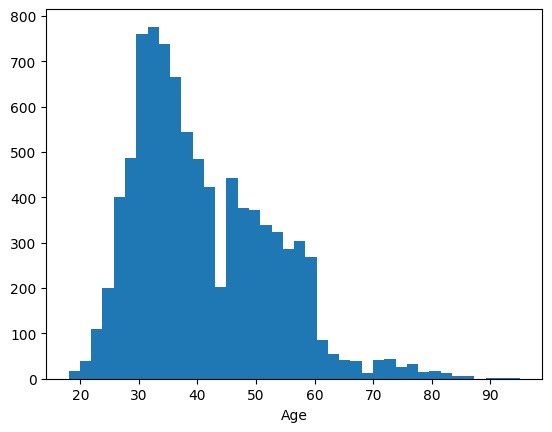

In [152]:
##Por cada variable puedo ver si esta sesagada
plt.hist(data.age, bins=40)
plt.xlabel("Age")  
plt.show()

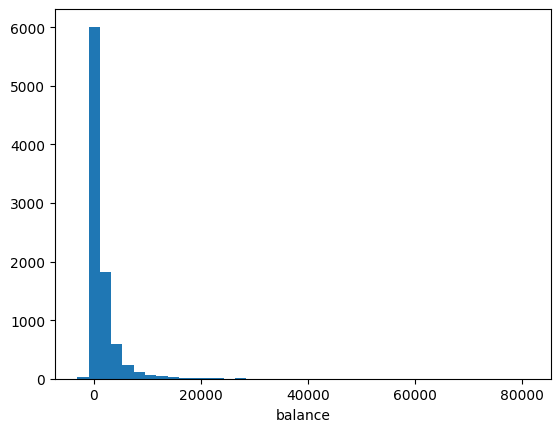

In [153]:
plt.hist(data.balance, bins=40)
plt.xlabel("balance")  
plt.show()

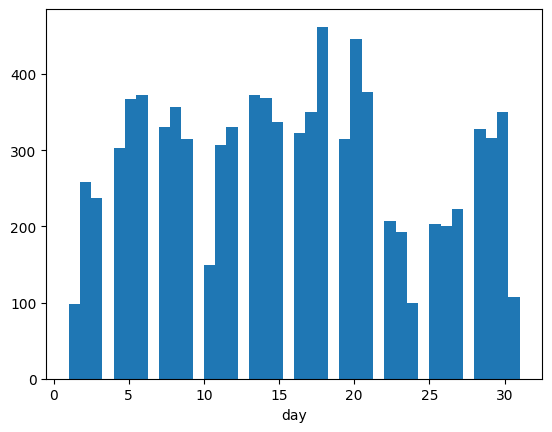

In [154]:
plt.hist(data.day, bins=40)
plt.xlabel("day")  
plt.show()

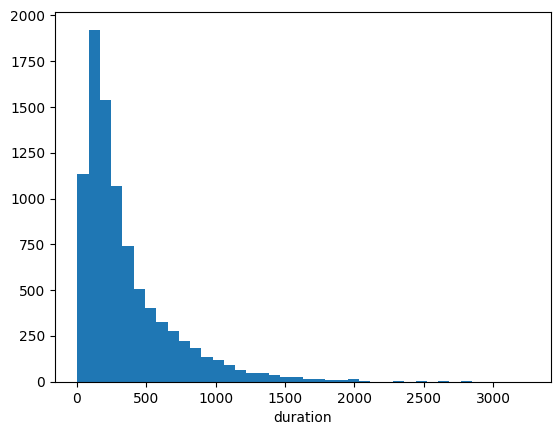

In [155]:
plt.hist(data.duration, bins=40)
plt.xlabel("duration")  
plt.show()

In [156]:
from sklearn.preprocessing import MinMaxScaler

In [157]:
from sklearn import preprocessing

In [158]:
data.columns

Index(['age', 'job', 'default', 'balance', 'housing', 'loan', 'day',
       'duration', 'campaign', 'pdays', 'previous', 'y', 'divorced', 'married',
       'single', 'desconocido', 'primary', 'secondary', 'tertiary',
       'Sin contacto', 'cellular', 'telephone', 'apr', 'aug', 'dec', 'feb',
       'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'No indicado',
       'failure', 'other', 'success'],
      dtype='object')

In [161]:
##Asigno las variables de entrada
X=data[['age', 'job', 'default', 'balance', 'housing', 'loan', 'day',
       'duration', 'campaign', 'pdays', 'previous', 'divorced', 'married',
       'single', 'desconocido', 'primary', 'secondary', 'tertiary',
       'Sin contacto', 'cellular', 'telephone', 'apr', 'aug', 'dec', 'feb',
       'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'No indicado',
       'failure', 'other', 'success']]

In [162]:
##Asigno variable de salida
Y=data[['y']]

In [163]:
from sklearn.model_selection import train_test_split

In [164]:
##Particiono los datos
x_train_validation, x_test, y_train_validation, y_test = \
train_test_split(X, Y, test_size=.20)

x_train, x_validation, y_train, y_validation =\
train_test_split(x_train_validation, y_train_validation, test_size=.20)

In [165]:
from sklearn.linear_model import LogisticRegression

In [166]:
x_train, x_validation, y_train, y_validation =\
train_test_split(x_train_validation, y_train_validation, test_size=.20)

In [167]:
##Ejecuto regresión logistica con 20%
clf=LogisticRegression(C=1.0, solver='newton-cg', max_iter=1000)
modelo_RL=clf.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [168]:
print("Exactitud con el conjunto de validación 20=", \
      modelo_RL.score(x_validation, y_validation))

Exactitud con el conjunto de validación 20= 0.8256944444444444


In [169]:
##Ejecuto regresión logistica con 15%
x_train, x_validation, y_train, y_validation =\
train_test_split(x_train_validation, y_train_validation, test_size=.15)

In [170]:
clf=LogisticRegression(C=1.0, solver='newton-cg', max_iter=1000)
modelo_RL=clf.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [171]:
print("Exactitud con el conjunto de validación 15=", \
      modelo_RL.score(x_validation, y_validation))

Exactitud con el conjunto de validación 15= 0.8342592592592593


In [172]:
import numpy as np

In [173]:
##Ejecuta de  nuevo 10 veces, desde la partición con 20%
exactitud=[]
for k in range(0,10):
  x_train, x_validation, y_train, y_validation = \
  train_test_split(x_train_validation, y_train_validation, test_size=.20)
  clf=LogisticRegression(C=1.0, solver='newton-cg', max_iter=500)
  modelo_RL=clf.fit(x_train, y_train)
  exactitud.append(modelo_RL.score(x_validation, y_validation))

print ("Exactitud promedio:", np.mean(exactitud))
print ("y Desviacion estandar:", np.std(exactitud))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Exactitud promedio: 0.8218055555555555
y Desviacion estandar: 0.007506427287150916


In [174]:
from sklearn.neural_network import MLPClassifier

In [175]:
##Ejecuto modelo red neuronal con unos parametros
modelo_NN=MLPClassifier(hidden_layer_sizes=(15,4), max_iter=700) 
modelo_NN.fit(x_train, y_train)
print(modelo_NN.score(x_validation, y_validation))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.78125


In [176]:
##Ejecuto modelo red neuronal con otros parametros
modelo_NN=MLPClassifier(hidden_layer_sizes=(12,3), max_iter=700) 
modelo_NN.fit(x_train, y_train)
print(modelo_NN.score(x_validation, y_validation))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7902777777777777


In [177]:
##Ejecuto varias veces el modelo
neuronas= [i for i in range(1,50,5)]
for i in neuronas:
  modelo_NN=MLPClassifier(hidden_layer_sizes=(i,i), max_iter=700, alpha=50, random_state=42) 
  modelo_NN.fit(x_train, y_train)
  print(modelo_NN.score(x_validation, y_validation))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7326388888888888


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7368055555555556


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7361111111111112


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7465277777777778


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7416666666666667


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7569444444444444


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.74375


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7354166666666667


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7520833333333333


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7361111111111112


In [178]:
##Inicializo arreglos
train_loss=list()
train_errors=list()
train_scores=list()
test_loss=list()
test_errors=list()
test_scores=list()

In [179]:
##Saco score de error, diferencia entre predicción y particion de entrenamiento, podria con esto sacar si es ta subentrenado o sobreentrenado
train_yhat=modelo_RL.predict(x_train)
train_loss=np.mean(abs(y_train-train_yhat))
train_errors.apend(train_loss)
train_acc=1 - train_loss
train_scores.append(train_acc)

ValueError: ignored

In [180]:
##Saco score de error, diferencia entre predicción y particion de prueba , podria con esto sacar si es ta subentrenado o sobreentrenado
test_yhat=modelo_RL.predict(x_test)
test_loss=np.mean(abs(y_train-train_yhat))
test_errors.apend(train_loss)
test_acc=1 - train_loss
test_scores.append(train_acc)

ValueError: ignored

In [181]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=  train_test_split(X, Y, train_size=0.6, random_state=11)


In [182]:
from sklearn.neural_network import MLPClassifier
model=MLPClassifier(hidden_layer_sizes=(10),max_iter=500, alpha=1,random_state=42 )
model.fit(x_train, y_train)
model.score(x_test, y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7608333333333334

In [ ]:
!pip install  plot_confusion_matrix

In [183]:
##Genera matriz de confusión  -- NO encuentra el paquete
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, x_test, y_test, labels=[0,1])


ImportError: ignored

Conclusiones: Después de varias iteraciones el mejor modelo par aeste caso de uso de telrmarkting es el de Regresión Logistica ya que su porcentaje de exactitud es el más cercano a 1.
Es muy importante realizar varias iteraciones de modelo para encontrar el que nos de mejores resultados y que podamos identificar con las herramientas que tenemos si esta subentrenado o sobreentrenado.
En temas de mercadotecnia es de gran utilidad ya que por ejemplo podemos identificar a quien dirigir las campañas de un nuevo producto o incluso por que canal es más conveniente dirigir los esfuerzos , ycon esto minimizamos costosos porque no se mandaría una campaña  a todos o por todos los medios y además un porcentaje más alto de probabilidad de éxito.
También con la matriz de confusión identificando los falsos positivos y negativos podemos ir perfeccionando el modelo.
También es importante identificar que variables son necesarias para no aumentar un nivel de procesamiento del modelo.

Respecto al punto 6, use el Label Encoder cuando son muchos valores en una variable para evitar usar espacio em disco y tener demasiadas variables ty para otras variables categóricas que no tienene tantas variables esta bien OneHotEncoder